# Numerical Differentiation
考慮定義域
\begin{align*}
    x\in[a,b),
\end{align*}
其中 $b-a=L$。

將定義域離散化爲 $N$ 點得到 $\textbf{X}$，其中
\begin{align*}
    x_i &= i\Delta x, \qquad i=0,1,2,\dots,N-1
\end{align*}
間隔 $\Delta x=L/N$。

方便展示，考慮函數
\begin{align*}
    f(x_i) &= e^{-5{x_i}^2},
\end{align*}
其中
\begin{align*}
    \frac{\mathrm{d}}{\mathrm{d}x}f(x_i) &= -10x_ie^{-5{x_i}^2}.
\end{align*}


In [1]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt

In [2]:
N = 2**6
a = -10
b = 10
L = b-a
X = np.linspace(a,b,N+1)[0:N]
def f(x):
    y = np.exp(-5*x**2)
    return y
Y = f(X)
YDiffAna = -10*X*Y

## Finite differences
將 $f(x+\Delta x)$ 進行泰勒展開得到
\begin{align*}
    f(x+\Delta x) &= f(x) + f'(x)\Delta x + \frac{f''(x)}{2}\Delta x^2 + \frac{f^{(3)}(x)}{3!}\Delta x^3+\cdots
\end{align*}
### FD1
將展開結果重組：
\begin{align*}
    \frac{\mathrm{d}}{\mathrm{d}x}f(x)
    &= \frac{1}{\Delta x}\left(f(x+\Delta x)-f(x)\right) - \frac{f''(x)}{2}\Delta x +\cdots \\
    f'_\mathrm{FD1}(x_i) 
    &= \frac{1}{\Delta x}\left(f(x_{i+1})-f(x_i)\right) +O(\Delta x).
\end{align*}
考慮週期邊界，FD1 是：

In [3]:
def NDiffFd1(X,Y):
    Dx  = X[1]-X[0]
    Yd  = (np.roll(Y,1)-Y)/Dx
    return Yd

YDiffFd1 = NDiffFd1(X,Y)

### FD2
類似地，$f(x-\Delta x)$ 可展開爲
\begin{align*}
    f(x-\Delta x) &= f(x) - f'(x)\Delta x + \frac{f''(x)}{2}\Delta x^2 - \frac{f^{(3)}(x)}{3!}\Delta x^3 +\cdots.
\end{align*}
與 FD1 結合可得到
\begin{align*}
    f(x+\Delta x)-f(x-\Delta x) &= 2f'(x)\Delta x + 2\frac{f^{(3)}(x)}{3!}\Delta x^3 +\cdots \\
    \frac{\mathrm{d}}{\mathrm{d}x}f(x) &= \frac{1}{2\Delta x}(f(x+\Delta x)-f(x-\Delta x)) -\frac{1}{6}f^{(3)}(x)\Delta x^2 +\cdots \\
    f'_\mathrm{FD2}(x_i) &= \frac{1}{2\Delta x}(f(x_{i+1})-f(x_{i-1})) +O(\Delta x^2).
\end{align*}

In [4]:
def NDiffFd2(X,Y):
    Dx  = X[1]-X[0]
    Yd  = (np.roll(Y,1)-np.roll(Y,-1))/(2*Dx)
    return Yd

YDiffFd2 = NDiffFd2(X,Y)

### FD4
同理對於 $f(x\pm 2\Delta x)$ 依然有
\begin{align*}
    f(x+2\Delta x)-f(x-2\Delta x) &= 2f'(x)2\Delta x + 2\frac{f^{(3)}(x)}{3!}(2\Delta x)^3 +\cdots \\
    f'(x) &= \frac{1}{4\Delta x}(f(x+2\Delta x)-f(x-2\Delta x)) -\frac{4}{6}f^{(3)}(x)\Delta x^2 +\cdots .
\end{align*}
與 FD2 結合可得到:
\begin{align*}
    f'_\mathrm{FD4}(x_i) &= \frac{2}{3\Delta x}(f(x_{i+1})-f(x_{i-1})) -\frac{1}{12\Delta x}(f(x_{i+2})-f(x_{i-2}))+ O(\Delta x^4).
\end{align*}

In [5]:
def NDiffFd4(X,Y):
    Dx  = X[1]-X[0]
    Yd  = (np.roll(Y,1)-np.roll(Y,-1))*(2/3/Dx)-(np.roll(Y,2)-np.roll(Y,-2))*(1/12/Dx)
    return Yd

YDiffFd4 = NDiffFd4(X,Y)

### FD6

In [6]:
def NDiffFd6(X,Y):
    Dx  = X[1]-X[0]
    Yd  = (np.roll(Y,1)-np.roll(Y,-1))*(3/4/Dx)-(np.roll(Y,2)-np.roll(Y,-2))*(3/20/Dx)+(np.roll(Y,3)-np.roll(Y,-3))*(1/60/Dx)
    return Yd

YDiffFd6 = NDiffFd6(X,Y)

## Spectral method
### FFT
使用 FFT：
\begin{align*}
    f(x_j) &= \sum_{k=-2/N}^{2/N-1}\hat{f}(k)e^{i\frac{2\pi}{L}kx_j},
\end{align*}
定義 $\omega(k)\equiv i\dfrac{2\pi}{L}k$ 則顯然
\begin{align*}
    f^{(n)}(x_j) &= \sum_{k=-2/N}^{2/N-1}\omega^n(k)\hat{f}(k)e^{i\frac{2\pi}{L}kx_j},
\end{align*}
在物理空間的一次微分即是在波譜空間乘以 $\omega$。

In [7]:
def NDiffFft(X,Y,od=1):
    N = len(X)
    L = X[-1]-X[0]+X[1]-X[0]
    if np.mod(len(Y),2) == 0:
        omega = fft.fftshift(1j*(2*np.pi/L)*np.arange(-(N/2),(N/2),1))
    else:
        omega = fft.fftshift(1j*(2*np.pi/L)*np.arange(-np.floor(N/2),np.floor(N/2)+1,1))
    YHat  = fft.fft(Y)
    YdHat = omega**od*YHat
    Yd    = np.real(fft.ifft(YdHat))
    return Yd

YDiffFft = NDiffFft(X,Y)

## Results
將 5 種方法計算得到的 $f'(\textbf{x})$ 繪製得到下圖：

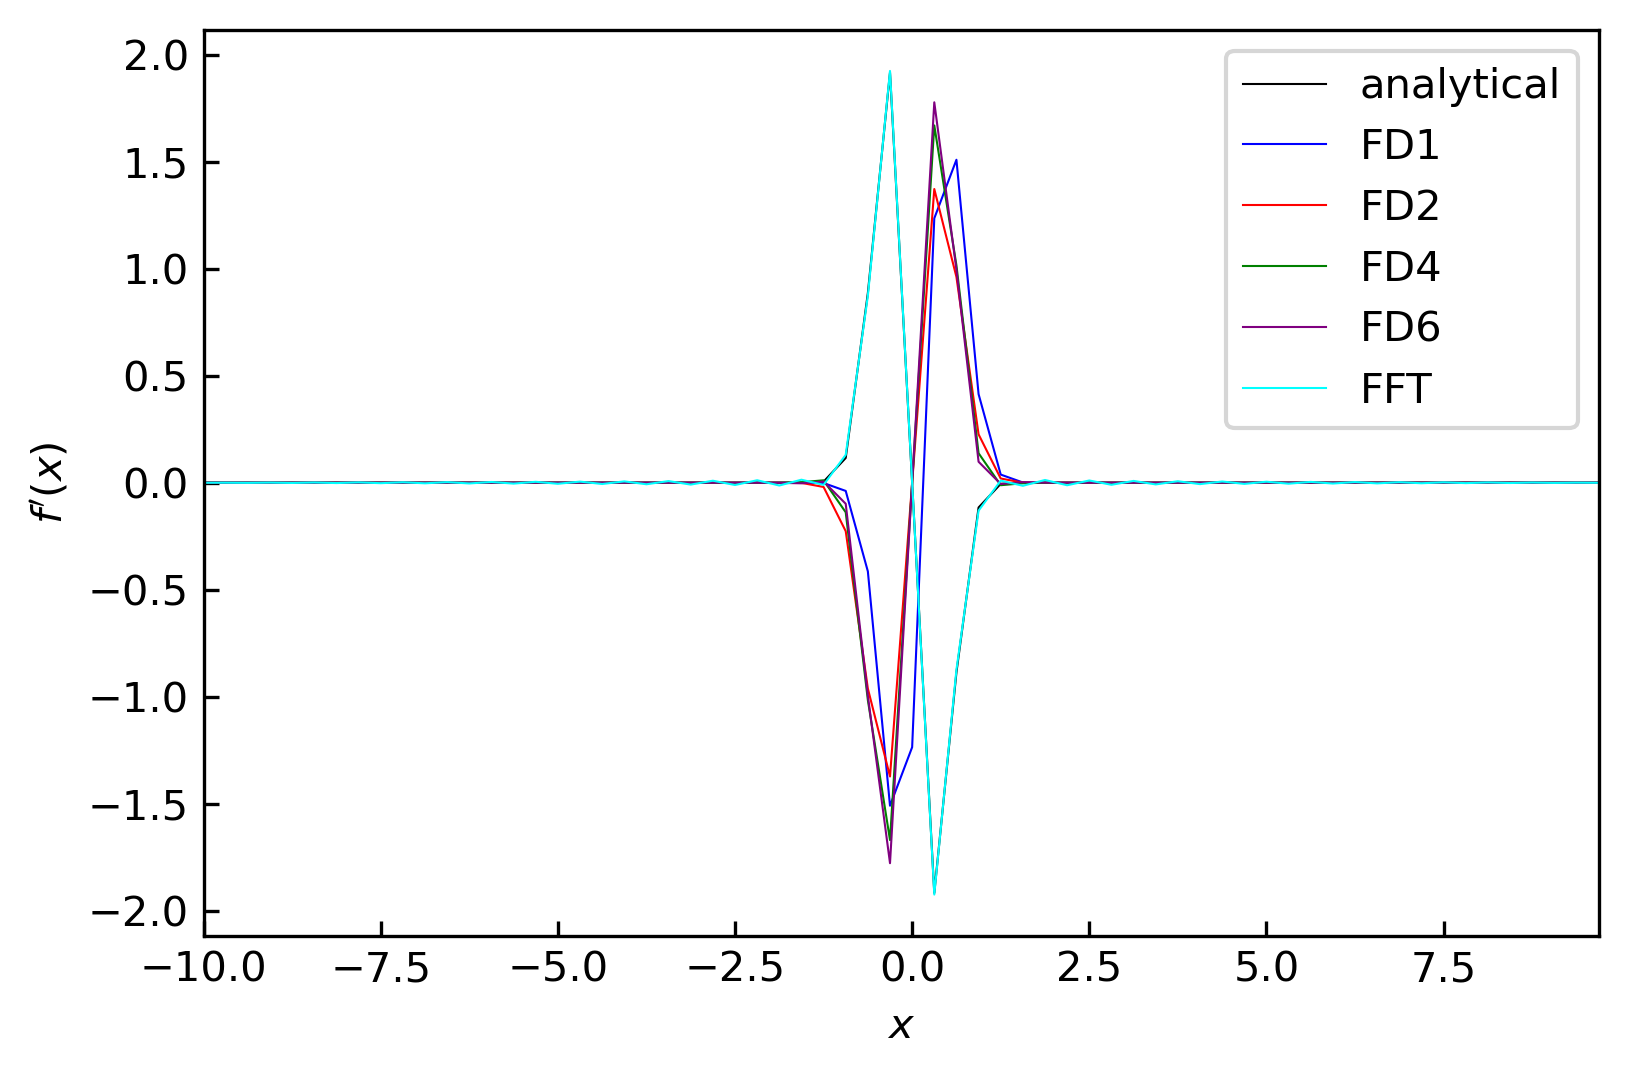

In [8]:
plt.figure(dpi=300)
plt.plot(X,YDiffAna,linewidth=0.5,color='k',label='analytical')
plt.plot(X,YDiffFd1,linewidth=0.5,color='b',label='FD1')
plt.plot(X,YDiffFd2,linewidth=0.5,color='r',label='FD2')
plt.plot(X,YDiffFd4,linewidth=0.5,color='g',label='FD4')
plt.plot(X,YDiffFd6,linewidth=0.5,color='purple',label='FD6')
plt.plot(X,YDiffFft,linewidth=0.5,color='cyan',label='FFT')
plt.xlim(min(X),max(X))
plt.xlabel('$x$',fontsize=10)
plt.ylabel('$f^\prime(x)$',fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(direction='in')
plt.show()

### Error
考慮 root-mean square error:
\begin{align*}
    \mathrm{RMS}=\frac{1}{N}\sum_{i=1}^{N}\Delta {x_i}^2
\end{align*}

In [9]:
def rms(A):
    Rms = sum(A**2)/len(A)
    return Rms

則 5 種方法誤差隨 $N$ 之變化爲：

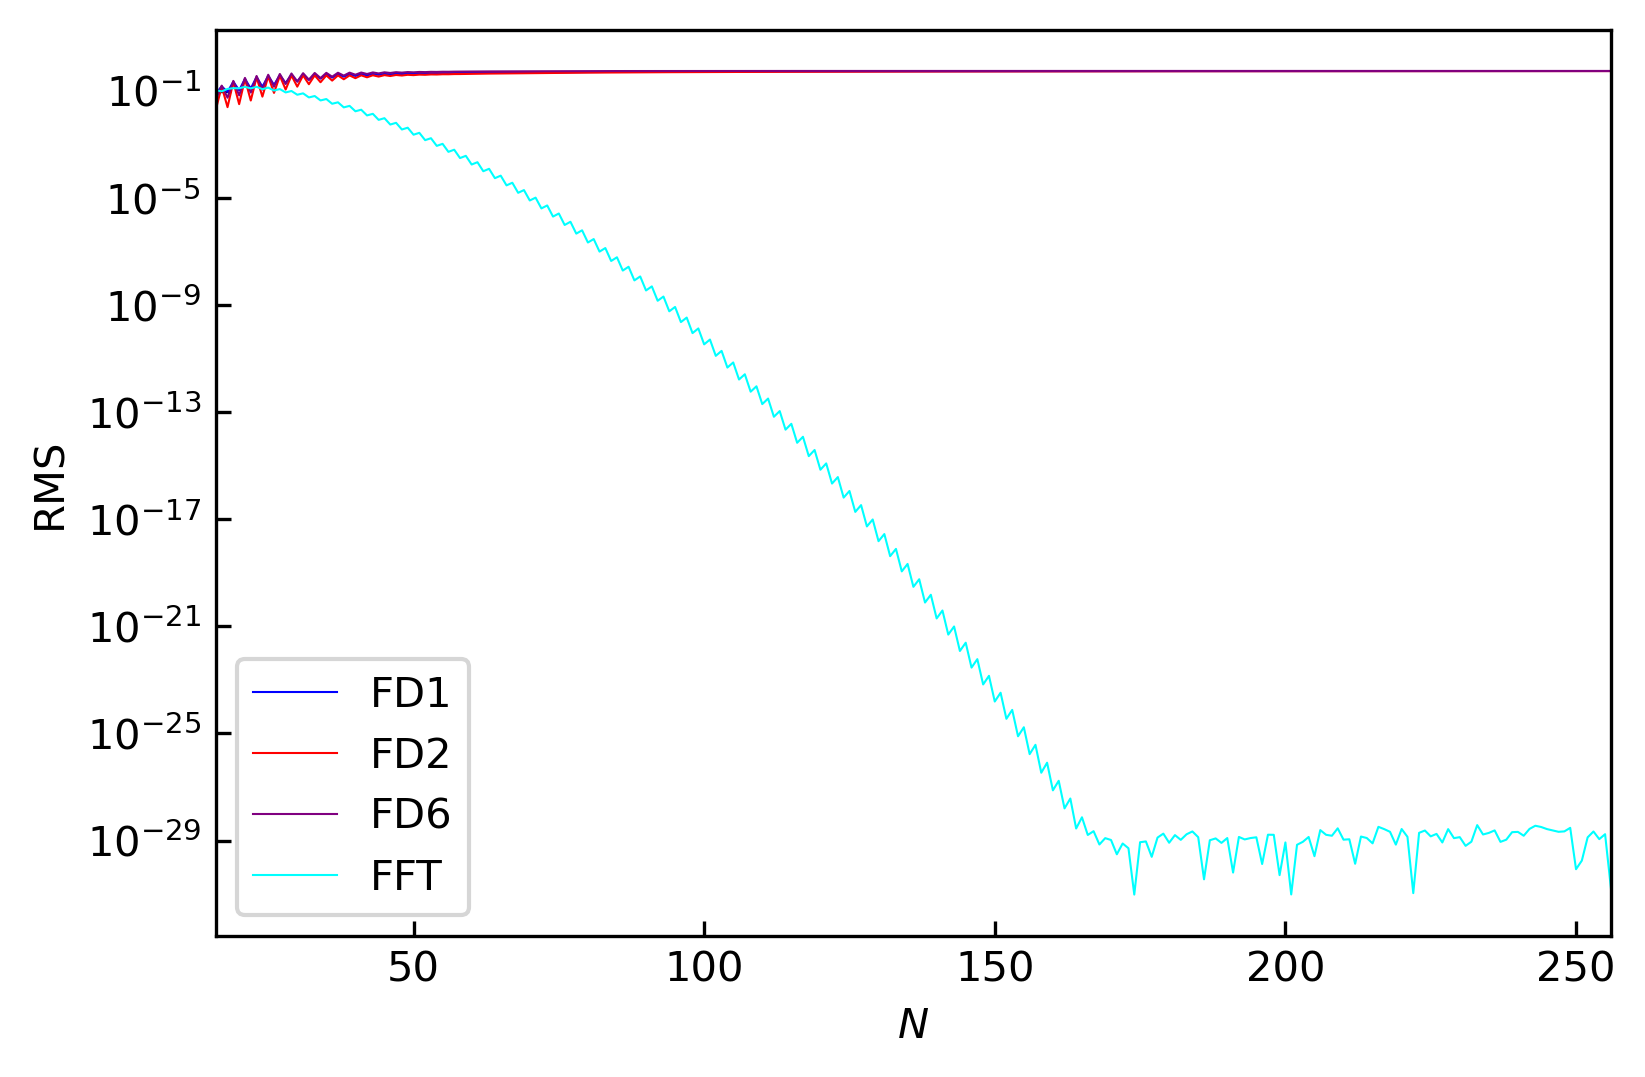

In [10]:
Nmin = 2**4
Nmax = 2**8
Narr = np.arange(Nmin,Nmax+1,1)
EDiffFd1 = np.zeros(len(Narr),)
EDiffFd2 = np.zeros(len(Narr),)
EDiffFd4 = np.zeros(len(Narr),)
EDiffFd6 = np.zeros(len(Narr),)
EDiffFft = np.zeros(len(Narr),)

for N in Narr:
    X = np.linspace(a,b,N+1)[0:N]
    Y = f(X)

    YDiffAna = -10*X*Y
    YDiffFd1 = NDiffFd1(X,Y)
    YDiffFd2 = NDiffFd2(X,Y)
    YDiffFd4 = NDiffFd4(X,Y)
    YDiffFd6 = NDiffFd6(X,Y)
    YDiffFft = NDiffFft(X,Y)

    EDiffFd1[N-Nmin] = rms(YDiffFd1-YDiffAna)
    EDiffFd2[N-Nmin] = rms(YDiffFd2-YDiffAna)
    EDiffFd4[N-Nmin] = rms(YDiffFd4-YDiffAna)
    EDiffFd6[N-Nmin] = rms(YDiffFd6-YDiffAna)
    EDiffFft[N-Nmin] = rms(YDiffFft-YDiffAna)

plt.figure(dpi=300)
plt.plot(Narr,EDiffFd1,linewidth=0.5,color='b',label='FD1')
plt.plot(Narr,EDiffFd2,linewidth=0.5,color='r',label='FD2')
plt.plot(Narr,EDiffFd6,linewidth=0.5,color='purple',label='FD6')
plt.plot(Narr,EDiffFft,linewidth=0.5,color='cyan',label='FFT')
plt.xlim(Nmin,Nmax)
plt.yscale('log')
plt.xlabel('$N$',fontsize=10)
plt.ylabel('RMS',fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(direction='in')
plt.show()